                  PROJETO de Portfólio

                    Empresa Walmart

                                                                
              por Jean Carlo Balem Bonatto

## 1) Business Understanding

### 1.1) Objetivo do Projeto

A Gerência da operação global do Walmart precisa estruturar o planejamento para 
os próximos anos. Para isso, precisa de uma estimativa, baseada em dados, de 
quanto aquele departamento irá lucrar ao longo do ano.

## 2) Data Understanding

### 2.1) Entendimento dos Metadados

São apresentados os dados de vendas semanais por departamento de 45 lojas do 
Walmart localizadas em diferentes regiões. 

Em adicional, também é fornecido variáveis como temperatura média da semana, preço do combustível, feriado, taxa 
de desemprego e outros valores.

Também são apresentadas 5 variáveis chamadas Markdown, que representam 
dados anônimos relacionados a descontos promocionais.

##### Entendimento das Features

Store: O número da loja

Size: Tamanho da Loja

Type: Tipo de Loja

Departamento: Número departamento da Loja

Date: especificando a semana (sexta-feira de cada semana) [Será 
utilizada somente para visualizações e não treinamento]

Temperature: Temperatura média na região (em °F)

FuelPrice: Custo do combustível na região

Weekly Sales: Representa as vendas semanais

Descrição dos Dados

MarkDown1-5: Dados de promoção aplicadas nas lojas. Disponíveis 
apenas após novembro de 2011 e não estão disponíveis para todas as 
lojas o tempo todo. Qualquer valor ausente é marcado com Nulo (Ou 
seja, sem promoção).

CPI: índice de preços ao consumidor (Consumer Price Index)

Unployment: Taxa de desemprego

IsHoliday: se a semana é um feriado especial

## 3) Data Preparation

### 3.1) Import das Bibliotecas

In [1]:
#Bibliotecas de Tratamentos dos dados
import pandas as pd
import numpy as np

#Biblioteca de Visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

#Biblioteca para Escalonamento das Váriaveis
from sklearn.preprocessing import StandardScaler

#Bibliotecas de Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor, HuberRegressor 
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor

#Bibliotecas de Métricas
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Biblioteca para Pipeline
from sklearn.pipeline import make_pipeline


### 3.2) Import dos dados

In [2]:
features = pd.read_csv('features.csv', sep= ",")
stores = pd.read_csv('stores.csv', sep= ",")
dept = pd.read_csv('dept.csv', sep= ",")

In [3]:
print("O Shape dos valores é:", features.shape)
features.head()

O Shape dos valores é: (8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
print("O Shape dos valores é:", stores.shape)
stores.head()

O Shape dos valores é: (45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
print("O Shape dos valores é:", dept.shape)
dept.head()

O Shape dos valores é: (421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


###  3.3) Análise Explorátória e Tratamento dos Dados


In [16]:
#União das tabelas pela Loja
df = dept.merge(features, how = 'left', on = ['Store','Date'])\
         .merge(stores, how = 'left', on = 'Store')
print("O Shape dos valores é:", df.shape)
df.head()

O Shape dos valores é: (421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [17]:
#Analise das informações dos tipos das váriáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [18]:
#Alteração para os tipos corretos das variaveis
    #Alteração para o tipo date
df['Date'] = pd.to_datetime(df['Date'])

    #Como Store é a Loja, correto enquadrar como category.
df['Store'] = df['Store'].astype('category') 
 
    #Como Dept é o departamento da loja, correto enquadrar como category.
df['Dept'] = df['Dept'].astype('category') 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  category      
 1   Dept          421570 non-null  category      
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421

In [9]:
#Avaliação da quantidade de nulos
print('Quantidade de linhas do Dataset', df.shape[0])

#Soma os nulos, e aplica uma divisão pelo total de linhas, multiplicados por 100.
print("Retorna abaixo % de nulos do dataset")
df.isnull().sum()/df.shape[0]*100


Quantidade de linhas do Dataset 421570
Retorna abaixo % de nulos do dataset


Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday_x      0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
IsHoliday_y      0.000000
Type             0.000000
Size             0.000000
dtype: float64

<AxesSubplot: >

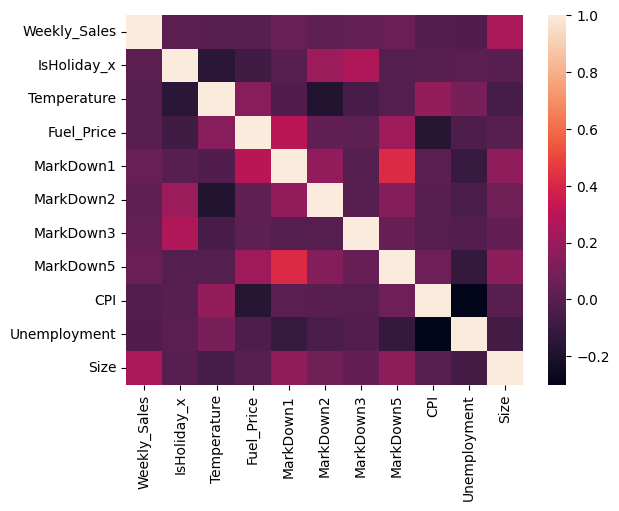

In [15]:
#Análise da Correlação das váriaveis
sns.heatmap(df.corr(method="pearson"))

In [11]:
#A variavel MarkDown1 à 5 é referente a promoção, é coerente ter muitos nulos. 
    #Os mesmos serão substituidos por 0(zero).
df.MarkDown1.fillna(value=0, inplace=True)
df.MarkDown2.fillna(value=0, inplace=True)
df.MarkDown3.fillna(value=0, inplace=True)
df.MarkDown5.fillna(value=0, inplace=True)


#Através do gráfico é possivel perceber que a uma Correlação positiva muito forte 
# entre MarkDown1 e MarkDown4, onde para evitarmos Overfiting, excluiremos MarkDown4
df.drop(columns='MarkDown4', axis=1, inplace=True)


#A váriável Holiday está em Duplicidade, por que continha em duas tabelas antes do Merge
df.drop(columns="IsHoliday_y", axis=1, inplace=True)

#Verificação da retirada dos Nulos
print("Retorna abaixo % de nulos do dataset")
df.isnull().sum()/df.shape[0]*100

Retorna abaixo % de nulos do dataset


Store           0.0
Dept            0.0
Date            0.0
Weekly_Sales    0.0
IsHoliday_x     0.0
Temperature     0.0
Fuel_Price      0.0
MarkDown1       0.0
MarkDown2       0.0
MarkDown3       0.0
MarkDown5       0.0
CPI             0.0
Unemployment    0.0
Type            0.0
Size            0.0
dtype: float64

## PARA NÃO QUEBRAR A MAQUINA, REDUZIREM DIMENSÃO

In [12]:
dfReduz = df.sample(10000)
dfReduz.shape

(10000, 15)

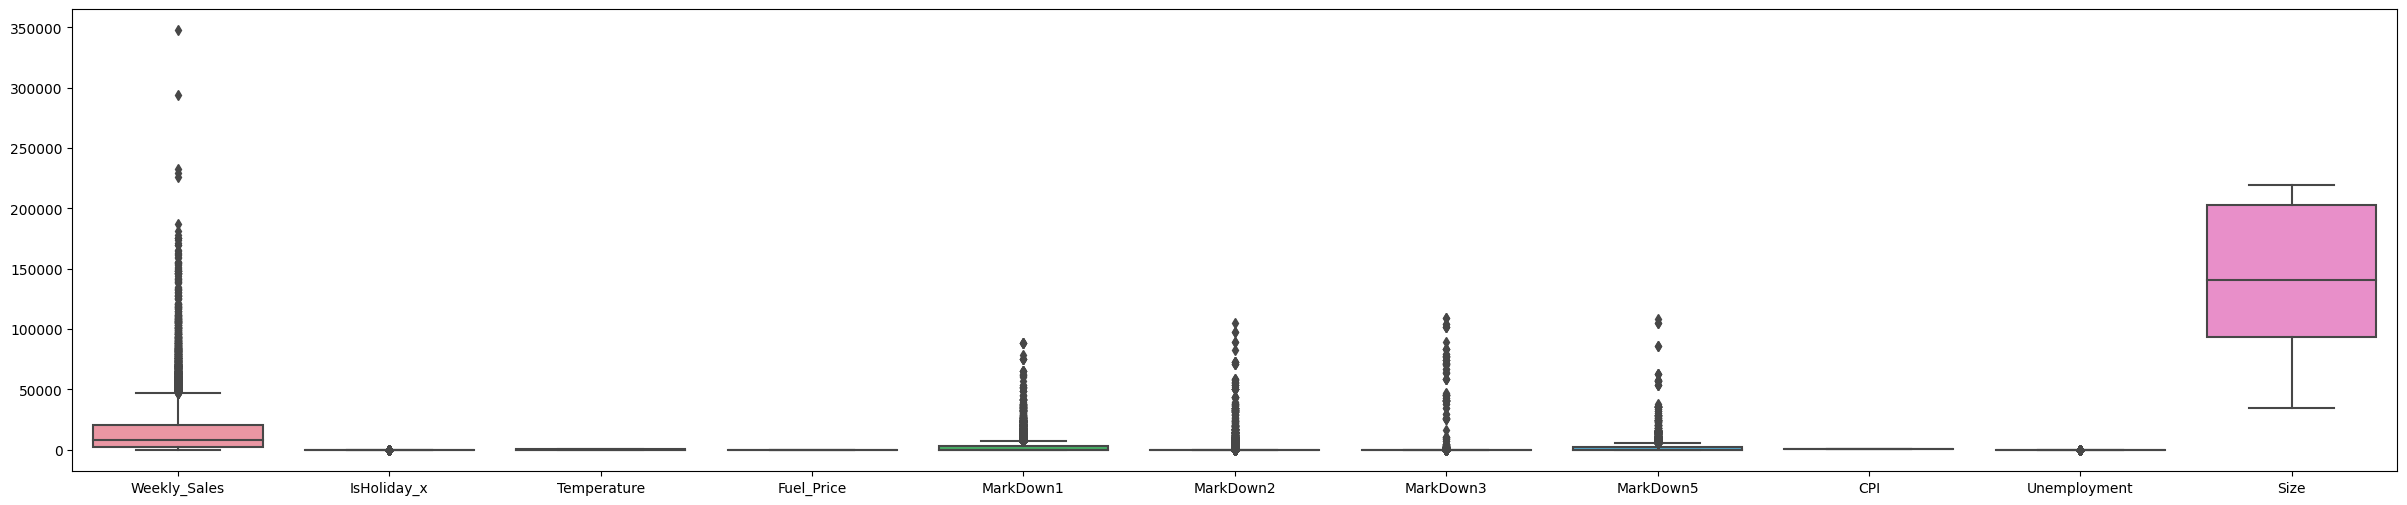

In [29]:
# Análise exploratória, através do Boxplot, para verificação de presença de Outliers
plt.figure(figsize=(30,6))
ax = sns.boxplot(data = dfReduz)
plt.show()

In [30]:
dfReduz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 123037 to 193977
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         10000 non-null  category      
 1   Dept          10000 non-null  category      
 2   Date          10000 non-null  datetime64[ns]
 3   Weekly_Sales  10000 non-null  float64       
 4   IsHoliday_x   10000 non-null  bool          
 5   Temperature   10000 non-null  float64       
 6   Fuel_Price    10000 non-null  float64       
 7   MarkDown1     10000 non-null  float64       
 8   MarkDown2     10000 non-null  float64       
 9   MarkDown3     10000 non-null  float64       
 10  MarkDown5     10000 non-null  float64       
 11  CPI           10000 non-null  float64       
 12  Unemployment  10000 non-null  float64       
 13  Type          10000 non-null  object        
 14  Size          10000 non-null  int64         
dtypes: bool(1), category(2), datet

In [14]:
target = 'Weekly_Sales'
scatterplots(df, [col for col in df.select_dtypes(include='number').columns if col != target], target, hue=None) 

NameError: name 'scatterplots' is not defined

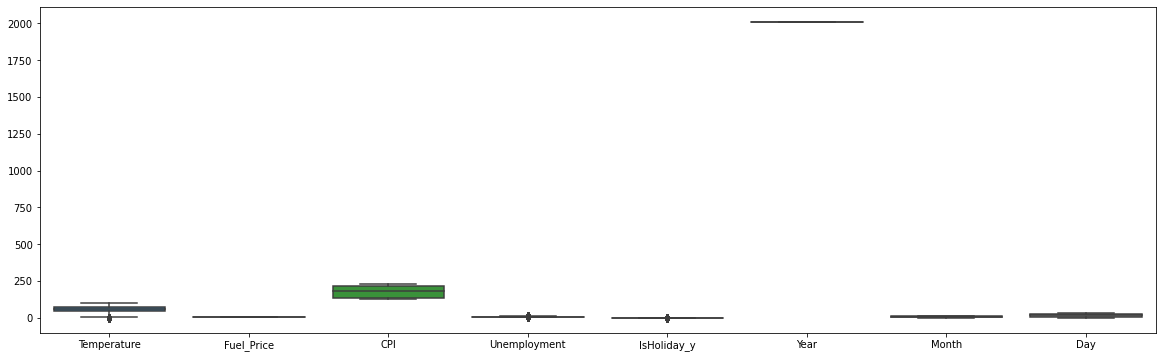

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.boxplot(data = df_clean.drop(['Weekly_Sales','Size','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis = 1))
plt.show()